<a href="https://colab.research.google.com/github/RoseSarlake/Computer-Vision/blob/main/CV_Assignment0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.OpenCV_basic.txt



Reading, displaying and writing an image



In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [20]:
# Load an color image in grayscale
img = cv2.imread("/content/drive/MyDrive/Colab/CV/images/messi.jpg",0)
print(type(img))

<class 'numpy.ndarray'>


In [21]:
# Write an image
cv2.imwrite("/content/drive/MyDrive/Colab/CV/images/messigray.png",img)

True

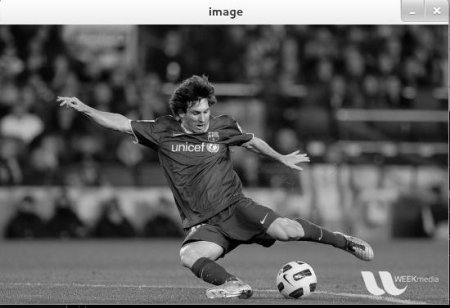

In [22]:
# Display an image
#cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Use of keys to manage program execution

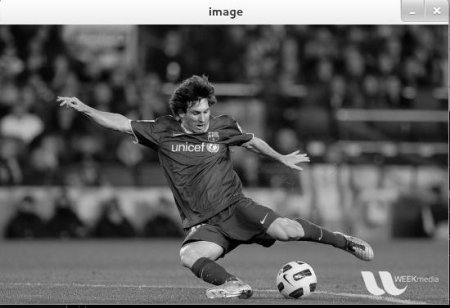

In [23]:
img = cv2.imread("/content/drive/MyDrive/Colab/CV/images/messi.jpg",0)
cv2_imshow(img)

# not works for colab
k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('messigray.png',img)
    cv2.destroyAllWindows()


Matplotlib (Graphics Library)

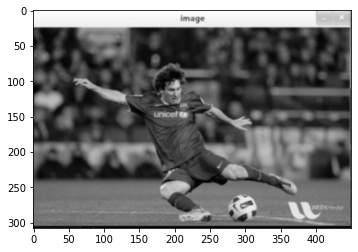

In [24]:
img = cv2.imread("/content/drive/MyDrive/Colab/CV/images/messi.jpg",0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

Drawing on images

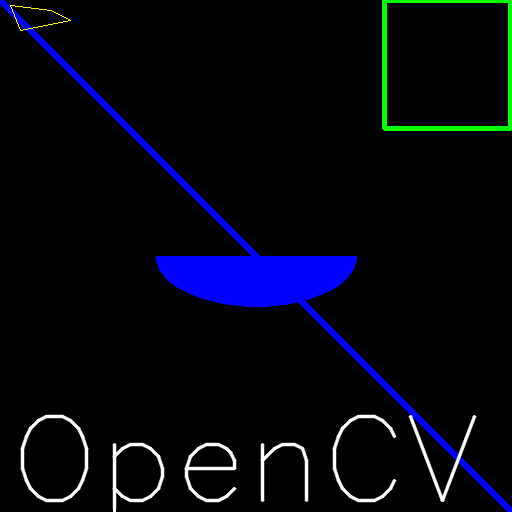

In [33]:
# create a black image
img = np.zeros((512,512,3), np.uint8)
# blue diagonal line with 5 px thickness
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)
# a green rectangle (3 px thickness)
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
# an ellipse
img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
# a yellow polygon
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255))
# add text to the image
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)

cv2_imshow(img)

# 2.matrix simulation

# 3.display several images simultaneosly

# 4.display several images with their titles

# 5.modifies the color of pixels in a list of pixel coordinates

# 6.examples